In [1]:
# Distance to Zone Analysis with BaseballCV

!pip install git+https://github.com/Jensen-holm/statcast-era-pitches.git
# Clone the repository and checkout the specific branch with BaseballTools class
!git clone https://github.com/dylandru/BaseballCV.git
%cd BaseballCV
!git checkout 94-add-baseballanalysis-class-to-have-functions-where-direct-analysis-can-be-conducted
!pip install -e .

  Cloning https://github.com/Jensen-holm/statcast-era-pitches.git to /tmp/pip-req-build-3iydt6gs
  Running command git clone --filter=blob:none --quiet https://github.com/Jensen-holm/statcast-era-pitches.git /tmp/pip-req-build-3iydt6gs
  Resolved https://github.com/Jensen-holm/statcast-era-pitches.git to commit 17091b2821099d5cef80d80fce3927e93c167c3c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statcast_pitches: filename=statcast_pitches-0.1.0-py3-none-any.whl size=4163 sha256=faa3aafc7e621c7a1abdd59e042c869b0396015403756286d419d49682efad71
  Stored in directory: /tmp/pip-ephem-wheel-cache-sguf0xmc/wheels/22/b2/d0/a0ec195fa1805ed1149117ae92660515ef7d531942b29f2ac0
Successfully built statcast_pitches
Cloning into 'BaseballCV'...
remote: Enumerating objects: 3382, done.
remote: Counting objects: 100% (247/247), done.
remote: Compressing objects: 100% (213/213), done.
remote: Tot

In [1]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 51.4 MB/s eta 0:00:00


Initialized LoadTools...
Using device: cuda
Initialized BaseballTools...
Model found at models/YOLO/pitcher_hitter_catcher_detector/model_weights/pitcher_hitter_catcher_detector_v4.pt
Model found at models/YOLO/glove_tracking/model_weights/glove_tracking.pt
Model found at models/YOLO/ball_tracking/model_weights/ball_trackingv4.pt
Models downloaded successfully!

Setting up parameters for analysis...
Analysis parameters:
- Date range: 2024-09-21 to 2024-09-21
- Max videos: 1
- Strike zone vertical adjustment factor: -0.1

Running distance-to-zone analysis...
This may take several minutes depending on the number of videos and your computing resources.
The tool will download videos from Baseball Savant and analyze them frame by frame.
Model found at models/YOLO/pitcher_hitter_catcher_detector/model_weights/pitcher_hitter_catcher_detector_v4.pt
Model found at models/YOLO/glove_tracking/model_weights/glove_tracking.pt
Model found at models/YOLO/ball_tracking/model_weights/ball_trackingv4.pt

Catcher Detection: 100%|██████████| 384/384 [00:18<00:00, 20.28it/s]


Completed catcher detection. Found 363 detections
Detecting glove in video: 746983_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4


Glove Detection: 100%|██████████| 384/384 [00:17<00:00, 22.57it/s]


Completed glove detection. Found 156 detections
Detecting baseball in video: 746983_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4


Baseball Detection: 100%|██████████| 384/384 [00:16<00:00, 23.33it/s]


Completed baseball detection. Found 68 detections
Detecting pitcher in video: 746983_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4


Pitcher Detection: 100%|██████████| 384/384 [00:18<00:00, 21.21it/s]


Completed pitcher detection. Found 384 detections
Detecting hitter in video: 746983_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4


Hitter Detection: 100%|██████████| 384/384 [00:18<00:00, 20.96it/s]


Completed hitter detection. Found 384 detections
Detecting when ball reaches glove...
Found 2 continuous ball detection sequences
Standard detection failed, trying with larger tolerance...
Expanded tolerance failed, trying closest approach method...
Found closest ball approach at frame 205 (distance: 7.16 pixels)
Finding best hitter bounding box...
Found valid hitter box at frame 198 with confidence 0.89
Detecting hitter's pose within bounding box...
Successfully detected valid pose for hitter
Detecting 3D pose with MediaPipe strictly within hitter box...
Successfully detected 3D pose for hitter with MediaPipe
Detecting home plate...
Searching for home plate around reference frame 205...
Processing 12 home plate detections for consensus...
After filtering, 12 valid detections remain
Consensus home plate box: (652, 414, 707, 428)
Average confidence: 0.29
Best matching frame: 207
Computing strike zone using MLB official dimensions...
Adjusting strike zone by -2 pixels (-0.10 * elbow-to-h

Creating Video: 100%|██████████| 384/384 [01:07<00:00,  5.67it/s]


Video saved to results/distance_to_zone_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4

Analysis complete! Analyzed 1 videos

Results summary:
--------------------------------------------------------------------------------
Play ID         Game            Distance (in)   Position             Video Available
--------------------------------------------------------------------------------
d19fdcf0-3081-4ff2-a456-1ad084244c93 746983          0.00            In Zone              Yes            
--------------------------------------------------------------------------------

Detailed results for Video 1 (Play ID: d19fdcf0-3081-4ff2-a456-1ad084244c93):
- Ball reached glove at frame 205
- Strike zone detected: 55x65 pixels at (652, 289)
- Distance to zone: 0.00 inches
- Position: In Zone

Displaying annotated video for Play ID: d19fdcf0-3081-4ff2-a456-1ad084244c93


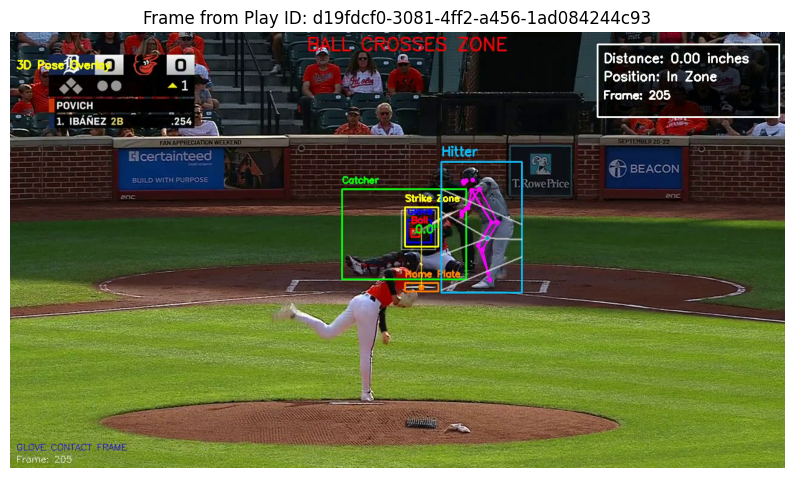

Video saved at: results/distance_to_zone_d19fdcf0-3081-4ff2-a456-1ad084244c93.mp4
You can download this video using the link below:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Analysis complete! Thank you for using BaseballCV's Distance-to-Zone tool.
Strike zone vertical adjustment factor used: -0.1
Positive values move the strike zone toward home plate, negative values move it away.


In [6]:
# Import required libraries
import os
import torch
from baseballcv.functions import BaseballTools, LoadTools
from IPython.display import display, HTML
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Initialize tools
load_tools = LoadTools()
print("Initialized LoadTools...")

# Check available device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Initialize BaseballTools with the detected device
baseball_tools = BaseballTools(device=device, verbose=True)
print("Initialized BaseballTools...")

# Download required models (if not already downloaded)
print("Downloading required models...")
load_tools.load_model("phc_detector")
load_tools.load_model("glove_tracking")
load_tools.load_model("ball_trackingv4")
print("Models downloaded successfully!")

# Set up parameters for distance_to_zone analysis
print("\nSetting up parameters for analysis...")
start_date = "2024-09-21"
end_date = "2024-09-21"  # Short date range for demonstration
max_videos = 1            # Limit to 1 video for demonstration
results_dir = "dtoz_results"  # Directory to save results

# Configure vertical adjustment factor for strike zone
zone_vertical_adjustment = -0.1  # 0.5 means move the strike zone 50% of elbow-to-hip distance toward home plate
                               # Negative values would move it away from home plate

print(f"Analysis parameters:")
print(f"- Date range: {start_date} to {end_date}")
print(f"- Max videos: {max_videos}")
print(f"- Strike zone vertical adjustment factor: {zone_vertical_adjustment}")

# Run the distance_to_zone analysis with custom vertical adjustment
print("\nRunning distance-to-zone analysis...")
print("This may take several minutes depending on the number of videos and your computing resources.")
print("The tool will download videos from Baseball Savant and analyze them frame by frame.")

results = baseball_tools.distance_to_zone(
    start_date=start_date,
    end_date=end_date,
    max_videos=max_videos,
    max_videos_per_game=1,
    create_video=True,
    catcher_model='phc_detector',
    glove_model='glove_tracking',
    ball_model='ball_trackingv4',
    zone_vertical_adjustment=zone_vertical_adjustment  # Pass the customized vertical adjustment factor
)

# Display results
print(f"\nAnalysis complete! Analyzed {len(results)} videos")

# Create a results table
print("\nResults summary:")
print("-" * 80)
print(f"{'Play ID':<15} {'Game':<15} {'Distance (in)':<15} {'Position':<20} {'Video Available':<15}")
print("-" * 80)

for result in results:
    play_id = result['play_id']
    game_pk = result['game_pk']
    distance = f"{result['distance_to_zone']:.2f}" if result['distance_to_zone'] is not None else "N/A"
    position = result['position'] if result['position'] is not None else "N/A"
    video = "Yes" if result['annotated_video'] and os.path.exists(result['annotated_video']) else "No"

    print(f"{play_id:<15} {game_pk:<15} {distance:<15} {position:<20} {video:<15}")

print("-" * 80)

# Display detailed results for each video
for i, result in enumerate(results):
    print(f"\nDetailed results for Video {i+1} (Play ID: {result['play_id']}):")

    if result['ball_glove_frame'] is not None:
        print(f"- Ball reached glove at frame {result['ball_glove_frame']}")
    else:
        print("- Ball-glove contact frame not detected")

    if result['strike_zone'] is not None:
        left, top, right, bottom = result['strike_zone']
        width = right - left
        height = bottom - top
        print(f"- Strike zone detected: {width}x{height} pixels at ({left}, {top})")
    else:
        print("- Strike zone not detected")

    if result['distance_to_zone'] is not None:
        print(f"- Distance to zone: {result['distance_to_zone']:.2f} inches")
        print(f"- Position: {result['position']}")
    else:
        print("- Distance to zone could not be calculated")

# Display the annotated videos
for i, result in enumerate(results):
    if result['annotated_video'] and os.path.exists(result['annotated_video']):
        video_path = result['annotated_video']
        print(f"\nDisplaying annotated video for Play ID: {result['play_id']}")
        display(HTML(f'<video width="640" height="480" controls><source src="{video_path}" type="video/mp4"></video>'))

        # Extract a frame from the video to show as a still image
        cap = cv2.VideoCapture(video_path)
        if result['ball_glove_frame'] is not None:
            # Try to get the frame where the ball crosses the zone
            cap.set(cv2.CAP_PROP_POS_FRAMES, result['ball_glove_frame'])
        else:
            # Otherwise get a frame from the middle of the video
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count // 2)

        ret, frame = cap.read()
        if ret:
            plt.figure(figsize=(10, 6))
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame from Play ID: {result['play_id']}")
            plt.axis('off')
            plt.show()
        cap.release()

        # Option to download the video
        print(f"Video saved at: {video_path}")
        print("You can download this video using the link below:")
        files.download(video_path)
    else:
        print(f"\nNo annotated video available for Play ID: {result['play_id']}")


print("\nAnalysis complete! Thank you for using BaseballCV's Distance-to-Zone tool.")
print(f"Strike zone vertical adjustment factor used: {zone_vertical_adjustment}")
print("Positive values move the strike zone toward home plate, negative values move it away.")